In [1]:
import glob
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/brodzik/.conda/envs/pmesdr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%cd ~/projects/PMESDR/CSU_FCDR/F17/1212/121201
%ls

/Users/brodzik/projects/PMESDR/CSU_FCDR/F17/1212/121201
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0020_E0202_R31339.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0202_E0344_R31340.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0344_E0526_R31341.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0526_E0708_R31342.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0708_E0850_R31343.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0850_E1032_R31344.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1032_E1214_R31345.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1214_E1356_R31346.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1356_E1538_R31347.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1538_E1720_R31348.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1720_E1902_R31349.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1902_E2044_R31350.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S2044_E2225_R31351.nc
CSU_SSMIS_FCDR_V01R00_F17_D20121201_S2226_E0007_R31352.nc


In [3]:
list = glob.glob("*nc")
list

['CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0708_E0850_R31343.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S2226_E0007_R31352.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0850_E1032_R31344.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1720_E1902_R31349.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1214_E1356_R31346.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1032_E1214_R31345.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0020_E0202_R31339.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0526_E0708_R31342.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1538_E1720_R31348.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1902_E2044_R31350.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0344_E0526_R31341.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1356_E1538_R31347.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S2044_E2225_R31351.nc',
 'CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0202_E0344_R31340.nc']

In [4]:
f = Dataset(list[0], "r", format="NETCDF")
f

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    Metadata_Conventions: CF-1.6, Unidata Dataset Discovery v1.0, NOAA CDR v1.0, GDS v2.0
    standard_name_vocabulary: CF Standard Name Table (v20, 11 September 2012)
    id: CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0708_E0850_R31343.nc
    naming_authority: gov.noaa.ncdc
    metadata_link: gov.noaa.ncdc:C00827
    title: CSU SSMIS FCDR
    product_version: V01R00
    revision_date: 2013-05-13
    summary: Colorado State University Special Sensor Microwave Imager/Sounder (SSMIS) Fundamental Climate Data Record (FCDR) of intercalibrated brightness temperatures
    keywords: EARTH SCIENCE > SPECTRAL/ENGINEERING > MICROWAVE > BRIGHTNESS TEMPERATURE
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 6.0
    platform: DMSP 5D-3/F17 > Defense Meteorological Satellite Program-F17
    sensor: SSMIS > Special Sensor Microwave Imager/Sounder
 

In [5]:
f.variables['fcdr_tb37h_env2']

<type 'netCDF4._netCDF4.Variable'>
float32 fcdr_tb37h_env2(nscan, npixel_env)
    units: kelvin
    _FillValue: -9999.9
    valid_range: [  50.  350.]
    standard_name: brightness_temperature
    long_name: NOAA FCDR of 37.0 GHz horizontally-polarized brightness temperature (channel 15)
    coordinates: lon_env2 lat_env2
    grid_mapping: crs
unlimited dimensions: 
current shape = (3220, 90)
filling on

In [33]:
data = f.variables['fcdr_tb37h_env2'][:]
np.shape(data)
f.close()

In [7]:
np.amin(data), np.amax(data)

(126.21, 295.95001)

In [9]:
28 * 300

8400

For 28" wide poster panel at 300 dpi, it should be 8400 pixels across;
If I keep the 90-pixel wide swaths, this gives me 94 swaths to work with,
but if i just randomly make them in groups of fibonacci numbers, say:

5 + 1 + 2 + 3 + 1 + 2 = 14 + 6 blanks = 20, try this:
Left side:

5 + 1 + 2

Right side:

+ 3 + 1 + 2 +


In [76]:
blank = np.zeros((3230,90))
np.shape(blank)

(3230, 90)

In [140]:
def add_new_swath(image, image_index, list, list_index):
    f = Dataset(list[list_index], "r", format="NETCDF")
    data = f.variables['fcdr_tb37h_env2'][:]
    image[0:data.shape[0], image_index * 90: (image_index * 90) + data.shape[1]] = data
    print("data:", np.amin(data), np.amax(data))
    print("image:",np.amin(image), np.amax(image))
    f.close()
    return(image)

In [154]:
my_image = np.zeros((3230,90 * 10))
my_image.fill(250.)
my_image = add_new_swath(my_image, 8, list, 0)
my_image = add_new_swath(my_image, 7, list, 1)
my_image = add_new_swath(my_image, 5, list, 2)
my_image = add_new_swath(my_image, 3, list, 3)
my_image = add_new_swath(my_image, 2, list, 4)
my_image = add_new_swath(my_image, 1, list, 5)

('data:', 126.21, 295.95001)
('image:', 126.20999908447266, 295.95001220703125)
('data:', 127.73, 289.51001)
('image:', 126.20999908447266, 295.95001220703125)
('data:', 125.34, 288.63)
('image:', 125.33999633789062, 295.95001220703125)
('data:', 125.62, 289.79001)
('image:', 125.33999633789062, 295.95001220703125)
('data:', 127.3, 283.75)
('image:', 125.33999633789062, 295.95001220703125)
('data:', 127.7, 285.81)
('image:', 125.33999633789062, 295.95001220703125)


In [142]:
my_image.shape

(3230, 900)

(-0.5, 899.5, 3229.5, -0.5)

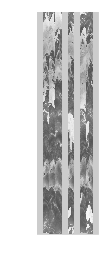

In [155]:
fig, ax = plt.subplots(1, 1)
plt.imshow(my_image, cmap=plt.cm.gray, interpolation='None',
          vmin=50., vmax=300.)
plt.axis('off')

In [156]:
outfile = "/Users/brodzik/CSU_swath_20121201_right_side.jpg"
fig.savefig(outfile,dpi=1200)

In [157]:
my_image = np.zeros((3230,90 * 10))
my_image.fill(250.)
my_image = add_new_swath(my_image, 9, list, 6)
my_image = add_new_swath(my_image, 8, list, 7)
my_image = add_new_swath(my_image, 6, list, 8)
my_image = add_new_swath(my_image, 4, list, 9)
my_image = add_new_swath(my_image, 3, list, 10)
my_image = add_new_swath(my_image, 2, list, 11)
my_image = add_new_swath(my_image, 1, list, 12)
my_image = add_new_swath(my_image, 0, list, 13)


('data:', 130.05, 287.63)
('image:', 130.05000305175781, 287.6300048828125)
('data:', 126.16, 284.63)
('image:', 126.16000366210938, 287.6300048828125)
('data:', 126.89, 289.29999)
('image:', 126.16000366210938, 289.29998779296875)
('data:', 125.87, 289.69)
('image:', 125.87000274658203, 289.69000244140625)
('data:', 126.98, 284.72)
('image:', 125.87000274658203, 289.69000244140625)
('data:', 127.71, 292.23001)
('image:', 125.87000274658203, 292.23001098632812)
('data:', 126.26, 292.87)
('image:', 125.87000274658203, 292.8699951171875)
('data:', 125.76, 285.42999)
('image:', 125.76000213623047, 292.8699951171875)


(-0.5, 899.5, 3229.5, -0.5)

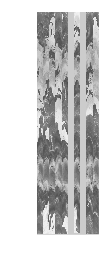

In [160]:
fig, ax = plt.subplots(1, 1)
plt.imshow(my_image, cmap=plt.cm.gray, interpolation='None',
          vmin=50., vmax=300.)
plt.axis('off')

In [161]:
outfile = "/Users/brodzik/CSU_swath_20121201_left_side.jpg"
fig.savefig(outfile,dpi=1200)

In [53]:
def swath_shapes(list):
    for filename in list:
        f = Dataset(filename, "r", format="NETCDF")
        print(filename, np.shape(f.variables['fcdr_tb37h_env2']))
        f.close()

In [54]:
swath_shapes(list)

('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0708_E0850_R31343.nc', (3220, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S2226_E0007_R31352.nc', (3206, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0850_E1032_R31344.nc', (3220, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1720_E1902_R31349.nc', (3220, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1214_E1356_R31346.nc', (3218, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1032_E1214_R31345.nc', (3204, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0020_E0202_R31339.nc', (3220, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0526_E0708_R31342.nc', (3218, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1538_E1720_R31348.nc', (3205, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1902_E2044_R31350.nc', (3221, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S0344_E0526_R31341.nc', (3218, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S1356_E1538_R31347.nc', (3221, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_S2044_E2225_R31351.nc', (3221, 90))
('CSU_SSMIS_FCDR_V01R00_F17_D20121201_